<a href="https://colab.research.google.com/github/sapnachavan7875-lgtm/Data-Science-Learning/blob/main/Sms_Spam_Detector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Install Required Libraries**

In [1]:
!pip install pandas numpy scikit-learn matplotlib seaborn

**import Libraries**

In [2]:
import pandas as pd
import numpy as np

# Machine Learning libraries
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

# Evaluation libraries
from sklearn.metrics import accuracy_score, confusion_matrix

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

**Direct Upload**

In [3]:
from google.colab import files

uploaded = files.upload()

Saving spam.csv to spam.csv


In [6]:
import pandas as pd

df = pd.read_csv("/content/spam.csv", encoding='latin-1')

df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


**Dataset Basic Info**

In [7]:
df.shape

(5572, 5)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


**Check Missing Values**

In [10]:
df.isnull().sum()

,0
v1,0
v2,0
Unnamed: 2,5522
Unnamed: 3,5560
Unnamed: 4,5566


**Only Required Columns**

In [11]:
df = df[['v1', 'v2']]

**check Columns name**

In [12]:
df.columns = ['label', 'message']

**Check missing Values**

In [13]:
df.isnull().sum()

,0
label,0
message,0


**Dataset Preview**

In [14]:
df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


**EDA Graph**

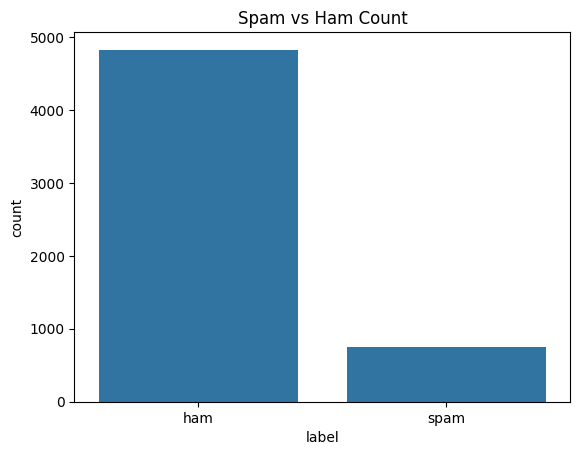

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='label', data=df)

plt.title("Spam vs Ham Count")

plt.show()

**Advanced Text Cleaning**

In [16]:
import string

# Lowercase conversion
df['message'] = df['message'].str.lower()

# Remove punctuation
df['message'] = df['message'].apply(lambda x: x.translate(str.maketrans('', '', string.punctuation)))

df.head()

/tmp/ipython-input-365/3972591259.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['message'] = df['message'].str.lower()
/tmp/ipython-input-365/3972591259.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['message'] = df['message'].apply(lambda x: x.translate(str.maketrans('', '', string.punctuation)))


,label,message
0,ham,go until jurong point crazy available only in ...
1,ham,ok lar joking wif u oni
2,spam,free entry in 2 a wkly comp to win fa cup fina...
3,ham,u dun say so early hor u c already then say
4,ham,nah i dont think he goes to usf he lives aroun...


**Check Duplicate Messages**

In [17]:
df.duplicated().sum()


np.int64(430)

**Number Remove**

In [18]:
df = df.drop_duplicates()
df = df.reset_index(drop=True)

**Final check**


In [19]:
print("Shape:", df.shape)
df.head()

Shape: (5142, 2)


,label,message
0,ham,go until jurong point crazy available only in ...
1,ham,ok lar joking wif u oni
2,spam,free entry in 2 a wkly comp to win fa cup fina...
3,ham,u dun say so early hor u c already then say
4,ham,nah i dont think he goes to usf he lives aroun...


**CountVectorizer import**

In [20]:
from sklearn.feature_extraction.text import CountVectorizer

**Create Vectorizer**

In [21]:
vectorizer = CountVectorizer()

**Text to convert numbers**

In [22]:
X = vectorizer.fit_transform(df['message'])

**Label conver different different Store**

In [23]:
y = df['label']

**Check Shape**

In [24]:
print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (5142, 9489)
y shape: (5142,)


**Sample Vector**

In [25]:
print(X[0])

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 18 stored elements and shape (1, 9489)>
  Coords	Values
  (0, 3797)	1
  (0, 8713)	1
  (0, 4704)	1
  (0, 6455)	1
  (0, 2504)	1
  (0, 1414)	1
  (0, 6051)	1
  (0, 4412)	1
  (0, 1884)	1
  (0, 3894)	1
  (0, 9217)	1
  (0, 4862)	1
  (0, 1882)	1
  (0, 2220)	1
  (0, 8294)	1
  (0, 3854)	1
  (0, 1175)	1
  (0, 8970)	1


**Train-Test Split**

In [28]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Training data:", X_train.shape)
print("Testing data:", X_test.shape)

Training data: (4113, 9489)
Testing data: (1029, 9489)


**Create Model**

In [30]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()

**Run**

In [31]:
model = MultinomialNB()

**Create model Train**

In [32]:
model.fit(X_train, y_train)

print("Model trained successfully")

Model trained successfully


**Accuracy Check**

In [34]:
from sklearn.metrics import accuracy_score

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

print("Model Accuracy:", accuracy)

Model Accuracy: 0.9757045675413022


**Confusion Matrix**

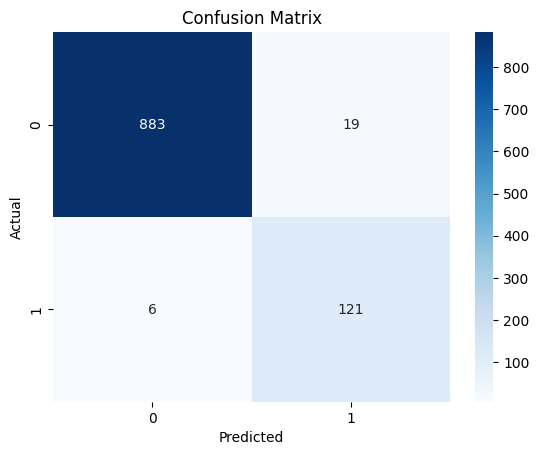

In [35]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")

plt.show()

**Test With your own message**

In [36]:
msg = ["Congratulations! You won a free prize"]

msg_vector = vectorizer.transform(msg)

prediction = model.predict(msg_vector)

print("Message:", msg[0])
print("Prediction:", prediction[0])

Message: Congratulations! You won a free prize
Prediction: spam


**Model Save**

In [37]:
import pickle

pickle.dump(model, open("spam_model.pkl", "wb"))
pickle.dump(vectorizer, open("vectorizer.pkl", "wb"))

print("Model saved successfully")

Model saved successfully


**TF-IDF Vectorization**

In [38]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()

X = tfidf.fit_transform(df['message'])

y = df['label']

print("TF-IDF shape:", X.shape)

TF-IDF shape: (5142, 9489)


**Train_Test Split**

In [39]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

**Train Multiple ML Models**

In [40]:
from sklearn.naive_bayes import MultinomialNB

nb_model = MultinomialNB()

nb_model.fit(X_train, y_train)

nb_pred = nb_model.predict(X_test)

**Logistic Regression**

In [41]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression()

lr_model.fit(X_train, y_train)

lr_pred = lr_model.predict(X_test)

**Random Forest**

In [42]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier()

rf_model.fit(X_train, y_train)

rf_pred = rf_model.predict(X_test)

**Compare Accuracy Of all Models**

In [43]:
from sklearn.metrics import accuracy_score

print("Naive Bayes Accuracy:",
      accuracy_score(y_test, nb_pred))

print("Logistic Regression Accuracy:",
      accuracy_score(y_test, lr_pred))

print("Random Forest Accuracy:",
      accuracy_score(y_test, rf_pred))

Naive Bayes Accuracy: 0.9582118561710399
Logistic Regression Accuracy: 0.9523809523809523
Random Forest Accuracy: 0.9747327502429544


**Accuracy Comparison Graph**

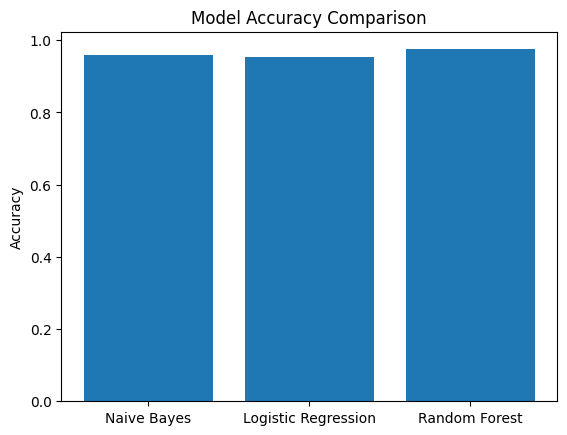

In [44]:
import matplotlib.pyplot as plt

models = ['Naive Bayes', 'Logistic Regression', 'Random Forest']

scores = [
    accuracy_score(y_test, nb_pred),
    accuracy_score(y_test, lr_pred),
    accuracy_score(y_test, rf_pred)
]

plt.bar(models, scores)

plt.title("Model Accuracy Comparison")

plt.ylabel("Accuracy")

plt.show()

**Confusion Matrix**

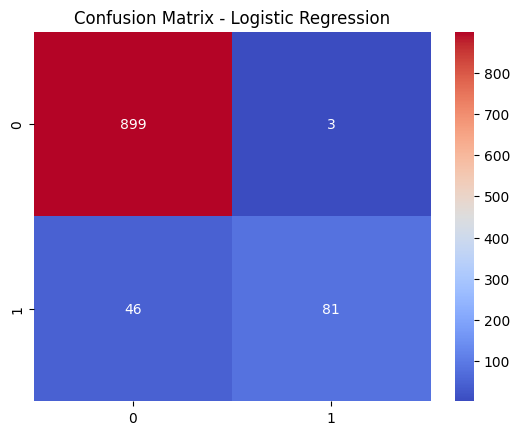

In [45]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, lr_pred)

sns.heatmap(cm,
            annot=True,
            cmap="coolwarm",
            fmt='d')

plt.title("Confusion Matrix - Logistic Regression")

plt.show()

**Classification Report**

In [46]:
from sklearn.metrics import classification_report

print(classification_report(y_test, lr_pred))

              precision    recall  f1-score   support

         ham       0.95      1.00      0.97       902
        spam       0.96      0.64      0.77       127

    accuracy                           0.95      1029
   macro avg       0.96      0.82      0.87      1029
weighted avg       0.95      0.95      0.95      1029



**Final Testing Block**

In [47]:
# Final custom message test

def predict_spam(message):
    vector = tfidf.transform([message])
    prediction = lr_model.predict(vector)
    return prediction[0]

# Example test
test_message = "Congratulations! You have won a free gift"

result = predict_spam(test_message)

print("Message:", test_message)
print("Prediction:", result)

Message: Congratulations! You have won a free gift
Prediction: spam


In [48]:
print("Spam Detector Model Ready for Deployment")

Spam Detector Model Ready for Deployment
